Metrics for Logistic Regression with Batch Gradient Descent:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Metrics for Logistic Regression with Stochastic Gradient Descent:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


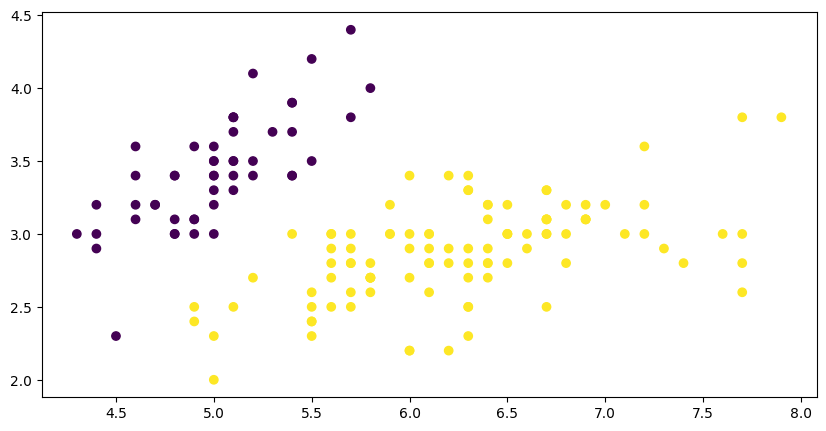

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class LogisticRegressionBatchGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.X = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.y = y
        self.m, self.n = self.X.shape
        self.weights = np.zeros(self.n)

        for i in range(self.iterations):
            z = np.dot(self.X, self.weights)
            h = self.sigmoid(z)
            gradient = np.dot(self.X.T, (h - self.y)) / self.m
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        z = np.dot(X, self.weights)
        h = self.sigmoid(z)
        return np.round(h)

class LogisticRegressionStochasticGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.X = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.y = y
        self.m, self.n = self.X.shape
        self.weights = np.zeros(self.n)

        for i in range(self.iterations):
            random_index = np.random.randint(0, self.m)
            X_i = self.X[random_index, :].reshape(1, -1)
            y_i = self.y[random_index]
            z = np.dot(X_i, self.weights)
            h = self.sigmoid(z)
            gradient = np.dot(X_i.T, (h - y_i))
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        z = np.dot(X, self.weights)
        h = self.sigmoid(z)
        return np.round(h)

# Load Iris dataset
data = load_iris()
X = data.data
y = (data.target != 0).astype(int)  # Convert to binary classification problem (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model using batch gradient descent
logreg_batchgd = LogisticRegressionBatchGD(learning_rate=0.1, iterations=1000)
logreg_batchgd.fit(X_train, y_train)
y_pred_batchgd = logreg_batchgd.predict(X_test)
batchgd_accuracy = accuracy_score(y_test, y_pred_batchgd)
batchgd_precision = precision_score(y_test, y_pred_batchgd)
batchgd_recall = recall_score(y_test, y_pred_batchgd)
batchgd_f1 = f1_score(y_test, y_pred_batchgd)

# Initialize and train Logistic Regression model using stochastic gradient descent
logreg_stochasticgd = LogisticRegressionStochasticGD(learning_rate=0.1, iterations=1000)
logreg_stochasticgd.fit(X_train, y_train)
y_pred_stochasticgd = logreg_stochasticgd.predict(X_test)
stochasticgd_accuracy = accuracy_score(y_test, y_pred_stochasticgd)
stochasticgd_precision = precision_score(y_test, y_pred_stochasticgd)
stochasticgd_recall = recall_score(y_test, y_pred_stochasticgd)
stochasticgd_f1 = f1_score(y_test, y_pred_stochasticgd)

# Plotting
plt.figure(figsize=(10, 5))

# Plot original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Original Data')



print("Metrics for Logistic Regression with Batch Gradient Descent:")
print("Accuracy:", batchgd_accuracy)
print("Precision:", batchgd_precision)
print("Recall:", batchgd_recall)
print("F1-score:", batchgd_f1)

print("\nMetrics for Logistic Regression with Stochastic Gradient Descent:")
print("Accuracy:", stochasticgd_accuracy)
print("Precision:", stochasticgd_precision)
print("Recall:", stochasticgd_recall)
print("F1-score:", stochasticgd_f1)



In [3]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Batch Gradient Descent Logistic Regression
conf_matrix_batchgd = confusion_matrix(y_test, y_pred_batchgd)

# Compute confusion matrix for Stochastic Gradient Descent Logistic Regression
conf_matrix_stochasticgd = confusion_matrix(y_test, y_pred_stochasticgd)

print("Confusion matrix for Logistic Regression model using Batch Gradient Descent:")
print(conf_matrix_batchgd)

print("\nConfusion matrix for Logistic Regression model using Stochastic Gradient Descent:")
print(conf_matrix_stochasticgd)


Confusion matrix for Logistic Regression model using Batch Gradient Descent:
[[10  0]
 [ 0 20]]

Confusion matrix for Logistic Regression model using Stochastic Gradient Descent:
[[10  0]
 [ 0 20]]
